In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score
# import statsmodels.api as sm

data = pd.read_csv("pima/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not BMI

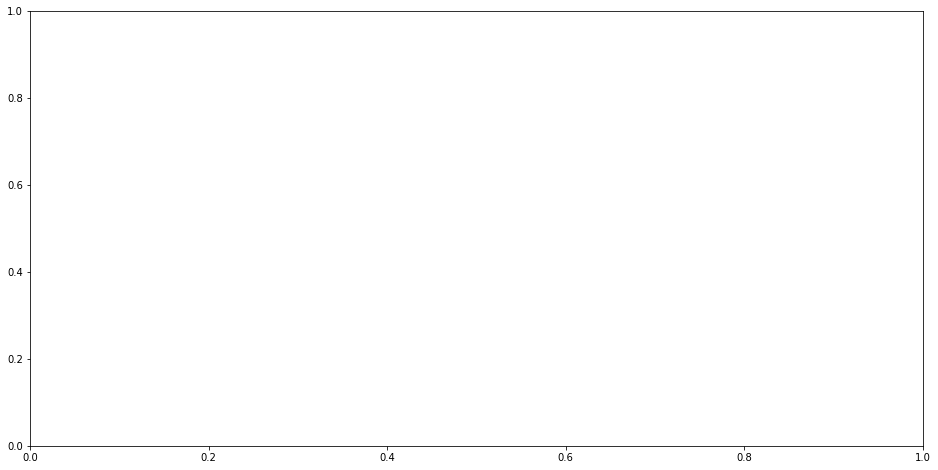

In [22]:
plt.figure(figsize=(16,8))
plt.scatter(
    data["Pregnancies"],
    data["Age"],
    c="black"
)
plt.xlabel("outcome")
plt.ylabel("pregnancies")
plt.show()